In [1]:
import os
os.chdir("../../codes/")

In [2]:
from src.load_explanations import load_explanations_of_many_models
from src.compare_explanations import cosine_similarity, radial_basis_function


explanations_many_models = load_explanations_of_many_models('imagenette2', ['ConvNeXtV2_Nano', 'DeiT_S'], 'GradCAM',
                                                            root_explanations="../results/20240505-finetuned-gradcam-256-ig-64-kernelshap-64/")
ex1 = explanations_many_models[0]['explanations']
ex2 = explanations_many_models[1]['explanations']

Loading explanations: 100%|██████████| 256/256 [00:00<00:00, 929.63it/s]


Loaded 256 common explanations for each model.


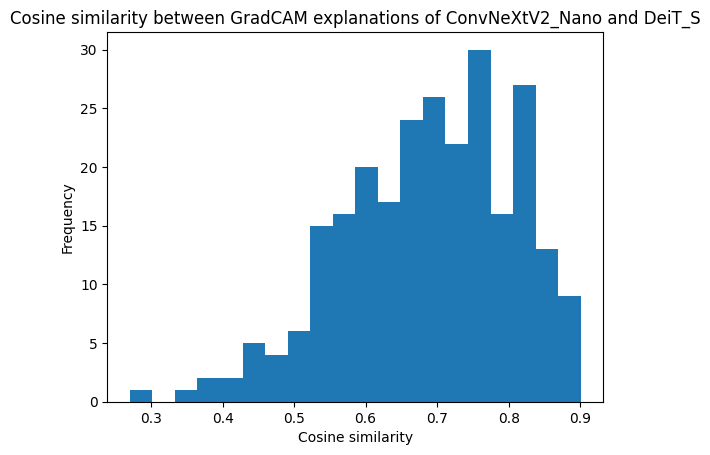

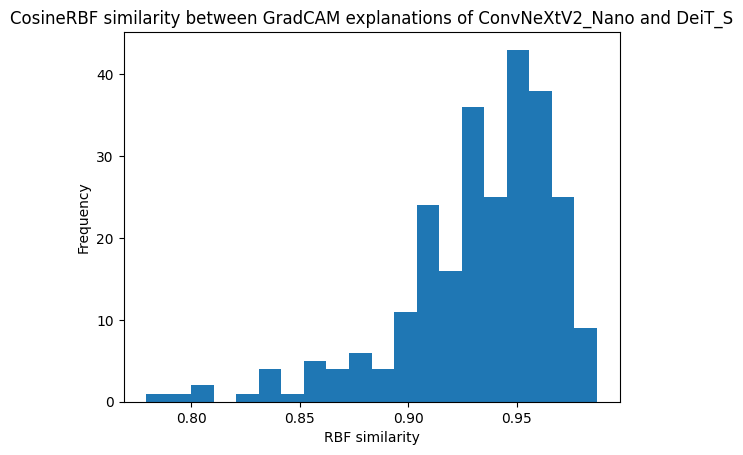

In [3]:
similarities_list = [cosine_similarity(e1, e2) for e1, e2 in zip(ex1, ex2)]
import matplotlib.pyplot as plt
plt.hist(similarities_list, bins=20)
plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
plt.title('Cosine similarity between GradCAM explanations of ConvNeXtV2_Nano and DeiT_S')
plt.show()

similarities_list = [radial_basis_function(e1, e2) for e1, e2 in zip(ex1, ex2)]
import matplotlib.pyplot as plt
plt.hist(similarities_list, bins=20)
plt.xlabel('RBF similarity')
plt.ylabel('Frequency')
plt.title('CosineRBF similarity between GradCAM explanations of ConvNeXtV2_Nano and DeiT_S')
plt.show()